In [85]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

import matplotlib 
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime

In [2]:
#关闭警告  
pd.set_option('mode.chained_assignment',None)

In [3]:
matplotlib.rcParams['font.sans-serif'] = ['FangSong'] #指定默认字体
matplotlib.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

#### 导入数据

In [4]:
data = pd.read_csv('data.csv',encoding = 'gb18030')

In [5]:
data.shape

(4754, 90)

In [6]:
data.head()

,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,20180507115231274000000023057383,卡号1,0.01,0.99,0,0.90,0.55,0.313,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,20180507121002192000000023073000,卡号1,0.02,0.94,2000,1.28,1.00,0.458,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,20180507125159718000000023114911,卡号1,0.04,0.96,0,1.00,1.00,0.114,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,20180507121358683000000388283484,卡号1,0.00,0.96,2000,0.13,0.57,0.777,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,20180507115448545000000388205844,卡号1,0.01,0.99,0,0.46,1.00,0.175,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0


#### 数据类型分析

In [7]:
data.info() 
#90列   4753行

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 90 columns):
Unnamed: 0                                    4754 non-null int64
custid                                        4754 non-null int64
trade_no                                      4754 non-null object
bank_card_no                                  4754 non-null object
low_volume_percent                            4752 non-null float64
middle_volume_percent                         4752 non-null float64
take_amount_in_later_12_month_highest         4754 non-null int64
trans_amount_increase_rate_lately             4751 non-null float64
trans_activity_month                          4752 non-null float64
trans_activity_day                            4752 non-null float64
transd_mcc                                    4752 non-null float64
trans_days_interval_filter                    4746 non-null float64
trans_days_interval                           4752 non-null float64
regional_mobility

 数值特征83个，字符串类型特征7个，多数值缺失值不是特别多。

In [8]:
data.describe()

,Unnamed: 0,custid,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
count,4754.000000,4.754000e+03,4752.000000,4752.000000,4754.000000,4751.000000,4752.000000,4752.000000,4752.000000,4746.000000,...,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4450.000000,4457.000000
mean,6008.414178,1.690993e+06,0.021806,0.901294,1940.197728,14.160674,0.804411,0.365425,17.502946,29.029920,...,3390.038142,1820.357864,9187.009199,76.042630,4.732331,5.227507,16153.690823,8007.696881,24.112809,55.181512
std,3452.071428,1.034235e+06,0.041527,0.144856,3923.971494,694.180473,0.196920,0.170196,4.475616,22.722432,...,1474.206546,583.418291,7371.257043,14.536819,2.974596,3.409292,14301.037628,5679.418585,37.725724,53.486408
min,5.000000,1.140000e+02,0.000000,0.000000,0.000000,0.000000,0.120000,0.033000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-2.000000
25%,3106.000000,7.593358e+05,0.010000,0.880000,0.000000,0.615000,0.670000,0.233000,15.000000,16.000000,...,2300.000000,1535.000000,4800.000000,77.000000,2.000000,3.000000,7800.000000,4737.000000,5.000000,10.000000
50%,6006.500000,1.634942e+06,0.010000,0.960000,500.000000,0.970000,0.860000,0.350000,17.000000,23.000000,...,3100.000000,1810.000000,7700.000000,79.000000,4.000000,5.000000,13800.000000,7050.000000,14.000000,36.000000
75%,8999.000000,2.597905e+06,0.020000,0.990000,2000.000000,1.600000,1.000000,0.480000,20.000000,32.000000,...,4300.000000,2100.000000,11700.000000,80.000000,7.000000,7.000000,20400.000000,10000.000000,24.000000,91.000000
max,11992.000000,4.004694e+06,1.000000,1.000000,68000.000000,47596.740000,1.000000,0.941000,42.000000,285.000000,...,10000.000000,6900.000000,87100.000000,87.000000,18.000000,20.000000,266400.000000,82800.000000,360.000000,323.000000


In [9]:
data.describe(include='O') #非数值特征的属性7列

,trade_no,bank_card_no,reg_preference_for_trad,source,id_name,latest_query_time,loans_latest_time
count,4754,4754,4752,4754,4478,4450,4457
unique,4754,1,5,1,4309,207,232
top,20180507123521248000000388367321,卡号1,一线城市,xs,李杰,2018-04-14,2018-05-03
freq,1,4754,3403,4754,5,423,134


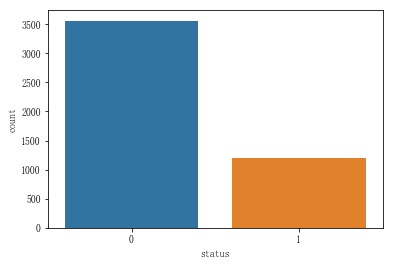

In [10]:
sns.countplot(data['status']) #查看目标值的比例

In [11]:
# 查看每行中缺失了多少个值，有的缺失了超过40个 这时考虑是否这些样本有用要删除掉。暂时先不考虑
line = []
for i in data.index:
    line.append(data.iloc[i].isnull().sum())
line_df =  pd.DataFrame(line, columns=['missing values'])
line_df.sort_values('missing values', ascending=False)[:200]
#line_df.loc[line_df['missing values']>40]

,missing values
2762,46
1458,45
3715,44
1906,44
1997,44
531,44
3531,44
2733,44
2246,44
86,44


In [12]:
stats = []
#计算每一列的  列名  列包含多少类  列空的比例  列最多的元素所占比例  列类型
for col in data.columns:
    stats.append((col, data[col].nunique(), data[col].isnull().sum() * 100 / data.shape[0], data[col].value_counts(normalize=True, dropna=False).values[0] * 100, data[col].dtype))
    
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
#   将缺失值 按照降序排列 
stats_df.sort_values('Percentage of missing values', ascending=False)

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
14,student_feature,2,63.062684,63.062684,float64
33,cross_consume_count_last_1_month,19,8.960875,64.535128,float64
58,latest_six_month_apply,65,6.394615,6.394615,float64
56,latest_one_month_apply,36,6.394615,17.522087,float64
55,latest_query_time,207,6.394615,8.897770,object
54,query_sum_count,74,6.394615,6.394615,float64
53,query_cash_count,17,6.394615,15.649979,float64
52,query_finance_count,25,6.394615,11.190576,float64
51,query_org_count,46,6.394615,6.394615,float64
50,apply_credibility,41,6.394615,11.022297,float64


#### 无关特征删除
- 类别特征   bank_card_no 和 source 的unique=1 删除

In [13]:
data.drop(['bank_card_no', 'source'], axis=1, inplace=True)

- trade-no

In [14]:
data['trade_no'].head(10)
data['trade_no'].tail(10)

4744    20180507115029481000000388194850
4745    20180507123619864000000388369012
4746    20180507125012243000000023109396
4747    20180507123811494000000388377504
4748    20180507121025853000000388266701
4749    20180507120519228000000388247328
4750    20180507114937914000000388192877
4751    20180507121340509000000388278785
4752    20180504161827128000000381357758
4753    20180507124243041000000388391027
Name: trade_no, dtype: object

In [15]:
def parse_trade_no(array):
    lst = [array[:4], array[4:6], array[6:8], array[-10:]]
    return lst

In [16]:
trade_no_data = pd.DataFrame(data['trade_no'].map(parse_trade_no).values.tolist(),columns=['tradeno_year', 'tradeno_month', 'tradeno_day', 'tradeno_id'])

In [17]:
trade_no_data.describe()

,tradeno_year,tradeno_month,tradeno_day,tradeno_id
count,4754,4754,4754,4754
unique,1,1,3,4754
top,2018,05,07,0388368622
freq,4754,4754,3682,1


trade_no 字段像个 id 字段，假设前 8 位是年月日信息，可以看出 trade_no 均是在 2018 年 5 月份，tradeno_id 各不相同，保留 tradeno_day，其他的信息删除。

In [18]:
data = pd.concat((data.drop('trade_no',axis=1),trade_no_data['tradeno_day']),axis=1)

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


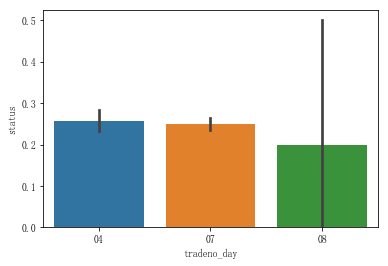

In [19]:
sns.barplot(data=data,x='tradeno_day',y = 'status') #柱状图比较数据的大小， 误差棒：标准差

- id__name 找出较多的人的名字, 查看下逾期率

In [20]:
idname_count = data['id_name'].value_counts()
idname_count  = idname_count[idname_count>3]
idn_df = data[data['id_name'].isin(idname_count.index)]

In [21]:
idn_df['id_name'].value_counts()

李明    5
李杰    5
张龙    5
陈波    4
李波    4
陈鹏    4
张超    4
刘强    4
张伟    4
Name: id_name, dtype: int64

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


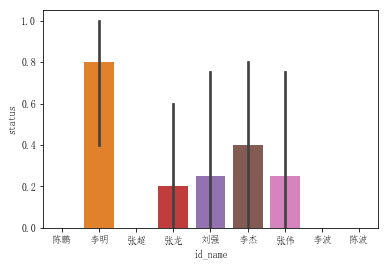

In [22]:
sns.barplot(data = idn_df, x = 'id_name',y = 'status')

In [23]:
data['is_LiMing'] = (data['id_name'] == '李明').apply(int)
data.drop('id_name',axis = 1,inplace = True)

### 数值特征

In [24]:
value_cols = data.describe().columns

(array([   0., 1000., 2000., 3000., 4000., 5000.]),
 <a list of 6 Text xticklabel objects>)

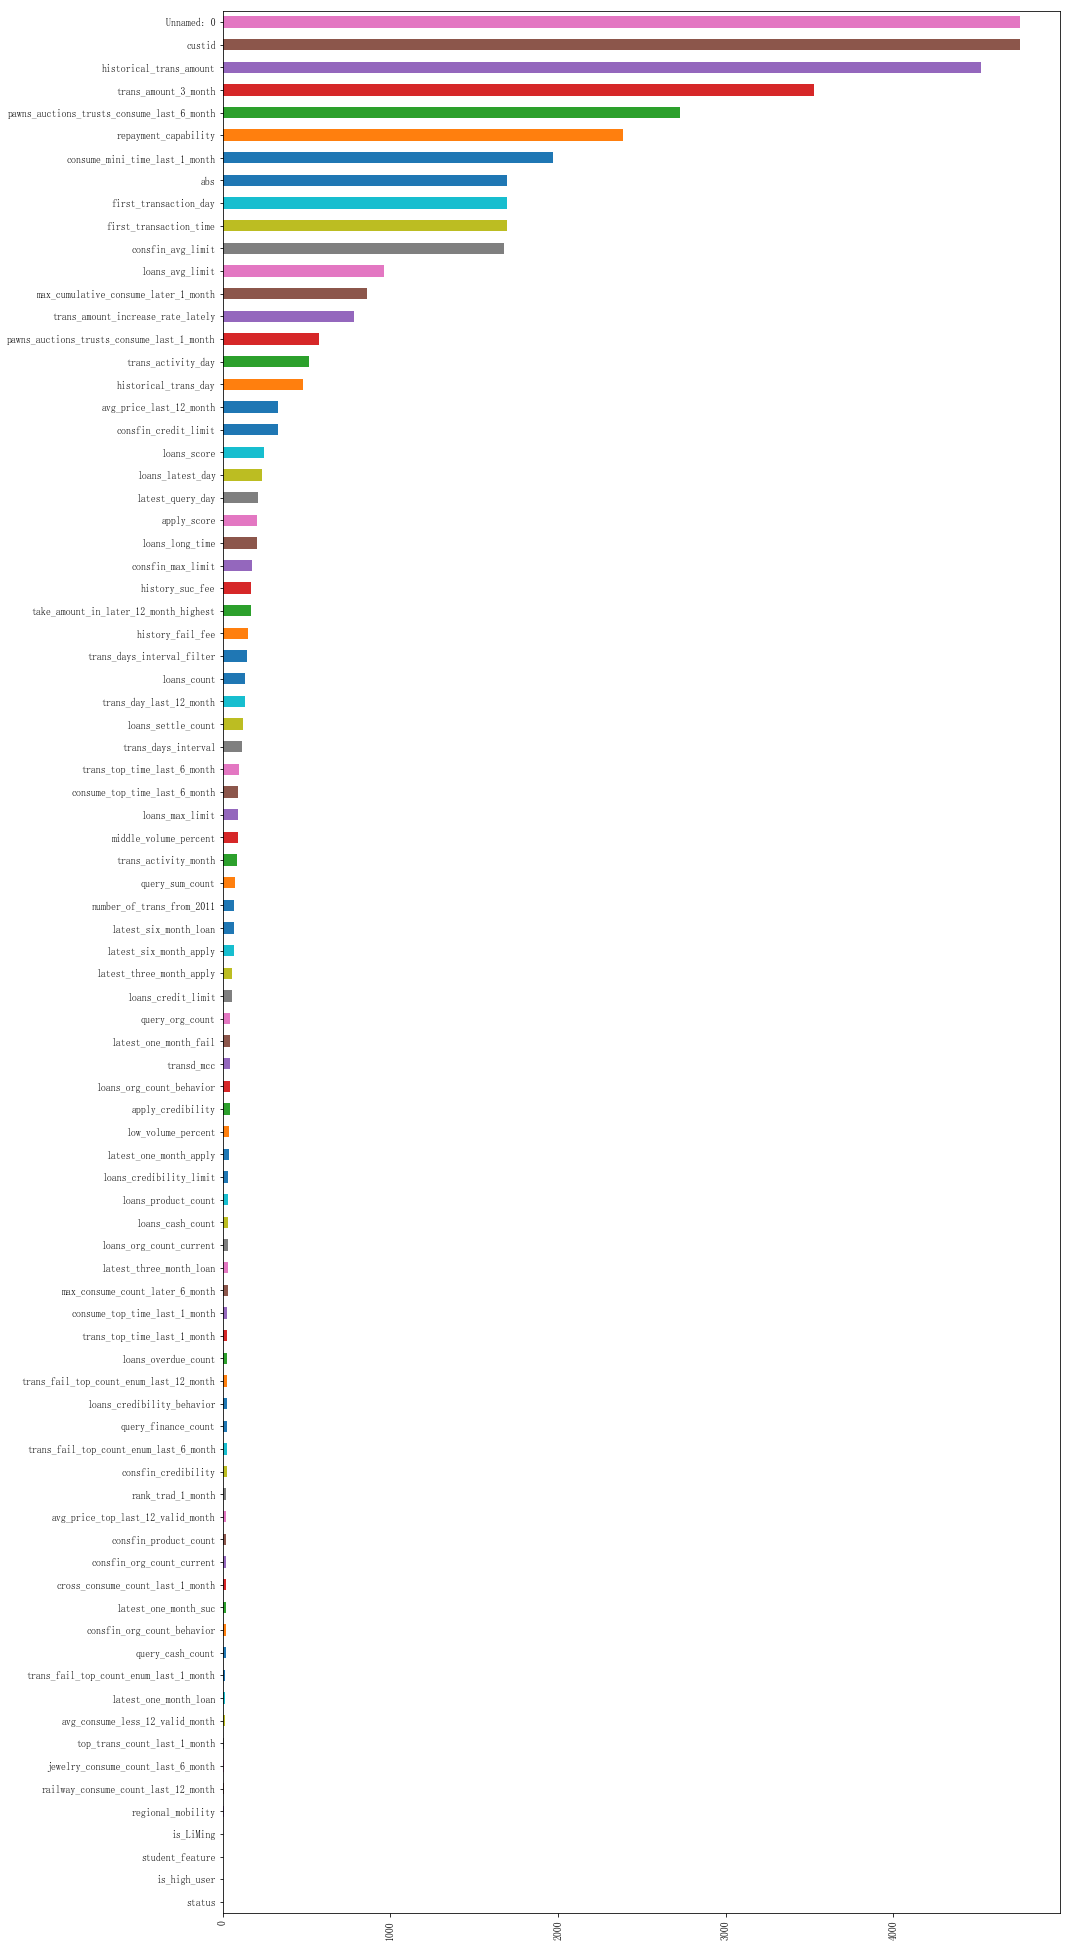

In [25]:
data[value_cols].nunique().sort_values().plot(kind = 'barh', figsize =(15,35))
plt.xticks(rotation = 90)

In [26]:
data[value_cols].columns[  data[value_cols].nunique()<10 ]

Index(['regional_mobility', 'student_feature', 'is_high_user',
       'top_trans_count_last_1_month', 'railway_consume_count_last_12_month',
       'jewelry_consume_count_last_6_month', 'status', 'is_LiMing'],
      dtype='object')

In [27]:
print('数值特征 unique < 10 个数：', len(data[value_cols].columns[data[value_cols].nunique()<10]))
print('数值特征 unique < 20 个数：', len(data[value_cols].columns[data[value_cols].nunique()<20]))
print('数值特征 unique < 30 个数：', len(data[value_cols].columns[data[value_cols].nunique()<30]))

数值特征 unique < 10 个数： 8
数值特征 unique < 20 个数： 16
数值特征 unique < 30 个数： 28


In [28]:
print('全部为 unique 的特征', data[value_cols].columns[data[value_cols].nunique()==len(data)])

全部为 unique 的特征 Index(['Unnamed: 0', 'custid'], dtype='object')


从 unique 数量来讲，没有相同值的情况，先不予删除。

#### custid
- custid 范围中 100~400W，如果假设注册越早，id 越小，看一下 id 大小与逾期率的关系。- 

In [29]:
np.logspace(1, 10, 7)

array([1.00000000e+01, 3.16227766e+02, 1.00000000e+04, 3.16227766e+05,
       1.00000000e+07, 3.16227766e+08, 1.00000000e+10])

In [30]:
custid_range = np.logspace(1, 7, 7)[1:]

In [31]:
df = data

In [32]:
df['cust_id_bin'] = pd.cut(df['custid'], bins=custid_range, labels=[str(i) for i in custid_range][:-1])

In [33]:
df['cust_id_bin'].value_counts()

1000000.0    3249
100000.0     1342
10000.0       149
1000.0         13
100.0           1
Name: cust_id_bin, dtype: int64

label 为 100 数据太少，并入 1000 中，1000000 之后再详细划分

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


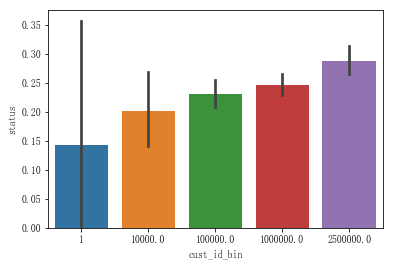

In [34]:
custid_range = [1, 1e4, 1e5, 1e6, 2.5e6, 5e6]
df['cust_id_bin'] = pd.cut(df['custid'], bins=custid_range, labels=[str(i) for i in custid_range][:-1])
sns.barplot(data=df, x='cust_id_bin', y='status')

正如猜想的一样，id 越小，逾期率越低，可能原因是越最近注册的，是新用户，紧急用钱，越可能逾期。先保留 id 这个特征。

#### Unnamed: 0

In [35]:
sum(df['Unnamed: 0'].diff(1)>0)

4753

In [36]:
len(df)

4754

Unnamed: 0 这个特征数值是递增的，删除

In [37]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,custid,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,...,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day,tradeno_day,is_LiMing,cust_id_bin
0,2791858,0.01,0.99,0,0.90,0.55,0.313,17.0,27.0,26.0,...,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0,07,0,2500000.0
1,534047,0.02,0.94,2000,1.28,1.00,0.458,19.0,30.0,14.0,...,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0,07,0,100000.0
2,2849787,0.04,0.96,0,1.00,1.00,0.114,13.0,68.0,22.0,...,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0,07,0,2500000.0
3,1809708,0.00,0.96,2000,0.13,0.57,0.777,22.0,14.0,6.0,...,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0,07,0,1000000.0
4,2499829,0.01,0.99,0,0.46,1.00,0.175,13.0,66.0,42.0,...,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0,07,0,1000000.0


In [38]:
data.head()

,custid,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,...,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day,tradeno_day,is_LiMing,cust_id_bin
0,2791858,0.01,0.99,0,0.90,0.55,0.313,17.0,27.0,26.0,...,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0,07,0,2500000.0
1,534047,0.02,0.94,2000,1.28,1.00,0.458,19.0,30.0,14.0,...,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0,07,0,100000.0
2,2849787,0.04,0.96,0,1.00,1.00,0.114,13.0,68.0,22.0,...,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0,07,0,2500000.0
3,1809708,0.00,0.96,2000,0.13,0.57,0.777,22.0,14.0,6.0,...,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0,07,0,1000000.0
4,2499829,0.01,0.99,0,0.46,1.00,0.175,13.0,66.0,42.0,...,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0,07,0,1000000.0


In [39]:
len(df.describe().columns)

83

### 数据类型转换

In [40]:
df.describe(include='O')

,reg_preference_for_trad,latest_query_time,loans_latest_time,tradeno_day
count,4752,4450,4457,4754
unique,5,207,232,3
top,一线城市,2018-04-14,2018-05-03,07
freq,3403,423,134,3682


#### reg_preference_for_trad

In [41]:
df['reg_preference_for_trad'].value_counts()

一线城市    3403
三线城市    1064
境外       150
二线城市     131
其他城市       4
Name: reg_preference_for_trad, dtype: int64

城市之间存在大小差别，采用自然数编码

In [42]:
city_map = {'一线城市':1, '二线城市':2, '三线城市':3, '其他城市':0, '境外':5}

In [43]:
df['reg_preference_for_trad'] = df['reg_preference_for_trad'].map(city_map)

#### tradeno_day

In [44]:
df['tradeno_day'] = df['tradeno_day'].astype('int')

In [45]:

df.describe(include='O')

,latest_query_time,loans_latest_time
count,4450,4457
unique,207,232
top,2018-04-14,2018-05-03
freq,423,134


### 缺失值处理
- 缺失值大概分成大类，比例在 60%，5%~10%, 1% 左右

In [46]:
nan_prop = df.isnull().sum(axis = 0)[df.isnull().sum(axis = 0)!=0]/df.shape[0]*100

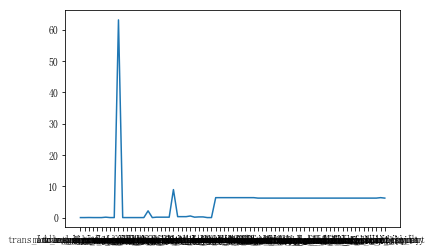

In [47]:
plt.plot(nan_prop)

####  缺失比例>10%
- 只有一列，转换成 one-hot 编码

In [48]:
nan100 = df[df.columns[df.isnull().sum(0)/df.shape[0]>0.1]]

In [49]:
nan100.columns

Index(['student_feature'], dtype='object')

In [50]:
nan100['student_feature'].value_counts()

1.0    1754
2.0       2
Name: student_feature, dtype: int64

In [51]:
def parse_student_feature(array):
    lst = [0, 0, 0]
    if array == 1:
        lst[0] = 1
    elif array == 2:
        lst[1] = 1
    else:
        lst[2] = 1
    return lst

In [52]:
stu_featdf = pd.DataFrame(df['student_feature'].apply(parse_student_feature).values.tolist(
), columns=['student_feat_1', 'student_feat_2', 'student_feat_na'])

In [53]:
df = pd.concat((df.drop('student_feature', axis=1), stu_featdf), axis=1)

#### 缺失比例 < 1%
- 用众数或平均数填补

In [54]:
na1 = df[df.columns[(df.isnull().sum(0)/df.shape[0]<0.01)&(df.isnull().sum(0)/df.shape[0]>0)]]
na1.nunique()

low_volume_percent                           40
middle_volume_percent                        90
trans_amount_increase_rate_lately           782
trans_activity_month                         84
trans_activity_day                          512
transd_mcc                                   41
trans_days_interval_filter                  147
trans_days_interval                         114
regional_mobility                             5
number_of_trans_from_2011                    70
first_transaction_time                     1693
historical_trans_day                        476
rank_trad_1_month                            20
avg_consume_less_12_valid_month              12
top_trans_count_last_1_month                  8
reg_preference_for_trad                       5
trans_top_time_last_1_month                  28
trans_top_time_last_6_month                  97
consume_top_time_last_1_month                28
consume_top_time_last_6_month                94
trans_fail_top_count_enum_last_1_month  

In [55]:
na1.head()

,low_volume_percent,middle_volume_percent,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,number_of_trans_from_2011,...,consume_top_time_last_6_month,trans_fail_top_count_enum_last_1_month,trans_fail_top_count_enum_last_6_month,trans_fail_top_count_enum_last_12_month,consume_mini_time_last_1_month,max_consume_count_later_6_month,railway_consume_count_last_12_month,jewelry_consume_count_last_6_month,first_transaction_day,trans_day_last_12_month
0,0.01,0.99,0.90,0.55,0.313,17.0,27.0,26.0,3.0,30.0,...,19.0,1.0,2.0,2.0,5.0,6.0,0.0,0.0,1738.0,85.0
1,0.02,0.94,1.28,1.00,0.458,19.0,30.0,14.0,4.0,23.0,...,30.0,0.0,3.0,3.0,330.0,9.0,0.0,0.0,779.0,84.0
2,0.04,0.96,1.00,1.00,0.114,13.0,68.0,22.0,1.0,9.0,...,68.0,3.0,6.0,6.0,0.0,3.0,0.0,0.0,338.0,95.0
3,0.00,0.96,0.13,0.57,0.777,22.0,14.0,6.0,3.0,33.0,...,8.0,1.0,8.0,8.0,31700.0,9.0,0.0,0.0,1831.0,82.0
4,0.01,0.99,0.46,1.00,0.175,13.0,66.0,42.0,1.0,12.0,...,66.0,3.0,3.0,3.0,0.0,3.0,0.0,0.0,435.0,88.0


In [56]:
na1.isnull().sum()

low_volume_percent                          2
middle_volume_percent                       2
trans_amount_increase_rate_lately           3
trans_activity_month                        2
trans_activity_day                          2
transd_mcc                                  2
trans_days_interval_filter                  8
trans_days_interval                         2
regional_mobility                           2
number_of_trans_from_2011                   2
first_transaction_time                      2
historical_trans_day                        2
rank_trad_1_month                           2
avg_consume_less_12_valid_month             2
top_trans_count_last_1_month                2
reg_preference_for_trad                     2
trans_top_time_last_1_month                 8
trans_top_time_last_6_month                 8
consume_top_time_last_1_month               8
consume_top_time_last_6_month               8
trans_fail_top_count_enum_last_1_month     16
trans_fail_top_count_enum_last_6_m

In [57]:
print(df[df['trans_fail_top_count_enum_last_1_month'].isnull()].index)
print(df[df['trans_fail_top_count_enum_last_6_month'].isnull()].index)
print(df[df['trans_fail_top_count_enum_last_12_month'].isnull()].index)

Int64Index([1022, 1205, 1275, 1487, 1791, 1795, 1901, 2703, 2762, 3021, 3075,
            3740, 3856, 4228, 4500, 4647],
           dtype='int64')
Int64Index([1022, 1205, 1275, 1487, 1791, 1795, 1901, 2703, 2762, 3021, 3075,
            3740, 3856, 4228, 4500, 4647],
           dtype='int64')
Int64Index([1022, 1205, 1275, 1487, 1791, 1795, 1901, 2703, 2762, 3021, 3075,
            3740, 3856, 4228, 4500, 4647],
           dtype='int64')


trans_fail_top_count_enum_last_X_month 这几个特征在同一个位置信息都是缺失的。
从数据来看，12month count 数目大于 6month，大于 1month。
填充缺失值后注意检查一下。  
unique<10 的分类用众数，

unique>10 的用平均数填充

In [58]:
def parse_na1(dftmp):
    d = {}
    for i in dftmp.columns:
        if dftmp[i].nunique() < 10:
            status1 = dftmp[df['status']==1][i].value_counts().index[0]
            status0 = dftmp[df['status']==0][i].value_counts().index[0]
            d[i] = {'1':status1, '0':status0}
        elif dftmp[i].nunique() > 10:
            status1 = int(dftmp[df['status']==1][i].dropna().mean())
            status0 = int(dftmp[df['status']==0][i].dropna().mean())
            d[i] = {'1':status1, '0':status0}
    return d

In [59]:
na1_values = parse_na1(na1)

In [60]:
for i in na1.columns:
    df.loc[(df[i].isnull()) & (df['status'] == 0), i] = na1_values[i]['0']
    df.loc[(df[i].isnull()) & (df['status'] == 1), i] = na1_values[i]['1']

In [61]:
data = df

In [62]:
-----------------------

SyntaxError: invalid syntax (<ipython-input-62-c3524f4dc0d6>, line 1)

#### 缺失比例 1%~10%
用随机森林预测填充这部分数据

In [63]:
na10 = df[df.columns[(df.isnull().sum(0)/df.shape[0] <= 0.1)
                     & (df.isnull().sum(0)/df.shape[0] >= 0.01)]]

In [67]:
def parse_time(s):
    try:
        dt = time.mktime(datetime.datetime.strptime(s, "%Y-%m-%d").timetuple())
    except:
        dt = np.nan
    return dt

In [68]:
na10['latest_query_time'] = na10['latest_query_time'].apply(parse_time)
na10['loans_latest_time'] = na10['loans_latest_time'].apply(parse_time)

In [69]:
def predict_nan(c):
#     c = 'consfin_avg_limit'
    nan_exist = df.loc[df[c].notnull()].drop(na10.columns, axis=1)
    y_nan = na10[c][na10[c].notnull()]
    nan_null = df.loc[df[c].isnull()].drop(na10.columns, axis=1)
    x = nan_exist.values
    y = y_nan.values
    rfr = RandomForestRegressor(n_estimators=100)
    rfr.fit(x, y)
    c_hat = rfr.predict(nan_null.values)
    c_hat = c_hat.astype(int)
    na10.loc[(na10[c].isnull()), c] = c_hat

In [70]:
for c in na10.columns:
    print('columns', c)
    predict_nan(c)

columns avg_price_top_last_12_valid_month
columns cross_consume_count_last_1_month
columns apply_score
columns apply_credibility
columns query_org_count
columns query_finance_count
columns query_cash_count
columns query_sum_count
columns latest_query_time
columns latest_one_month_apply
columns latest_three_month_apply
columns latest_six_month_apply
columns loans_score
columns loans_credibility_behavior
columns loans_count
columns loans_settle_count
columns loans_overdue_count
columns loans_org_count_behavior
columns consfin_org_count_behavior
columns loans_cash_count
columns latest_one_month_loan
columns latest_three_month_loan
columns latest_six_month_loan
columns history_suc_fee
columns history_fail_fee
columns latest_one_month_suc
columns latest_one_month_fail
columns loans_long_time
columns loans_latest_time
columns loans_credit_limit
columns loans_credibility_limit
columns loans_org_count_current
columns loans_product_count
columns loans_max_limit
columns loans_avg_limit
columns c

In [71]:

na10['loans_latest_time'] = pd.to_datetime(na10['loans_latest_time'], unit='s').dt.strftime('%Y-%m-%d')
na10['latest_query_time'] = pd.to_datetime(na10['latest_query_time'], unit='s').dt.strftime('%Y-%m-%d')


In [72]:
for i in na10.columns:
    df[i] = na10[i]

In [73]:
# 缺失值处理完毕
df.isnull().sum(axis=0)[df.isnull().sum(axis=0)!=0]/df.shape[0]

Series([], dtype: float64)

In [ ]:
data = df

####  还存在object的类型 和category

In [77]:
data = pd.get_dummies(data)

In [89]:
x = data.drop('status',axis=1)
y = data.status
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state =2018,shuffle = True,stratify = y) 
#shuffle 跟random_state是什么关系？ 只有shuffle为真时，random_state才会起作用,而且此时，无法进行分层stratified。
# shuffle为True,即按照random_state状态进行shuffle.分层是严格按照30%比例进行，不分层的话因为是随机数进行shuffle，所以是在30%上下浮动


#y_train[y_train == 1].size,y_test[y_test == 1].size ,y_train[y_train == 0].size,y_test[y_test == 0].size
X_train.shape[0], X_test.shape[0], y_train.size, y_test.size

(3327, 1427, 3327, 1427)

## 特征过程
- 用IV和随机森林进行特征选择

In [93]:
X_train.columns

Index(['custid', 'low_volume_percent', 'middle_volume_percent',
       'take_amount_in_later_12_month_highest',
       'trans_amount_increase_rate_lately', 'trans_activity_month',
       'trans_activity_day', 'transd_mcc', 'trans_days_interval_filter',
       'trans_days_interval',
       ...
       'loans_latest_time_2018-05-01', 'loans_latest_time_2018-05-02',
       'loans_latest_time_2018-05-03', 'loans_latest_time_2018-05-04',
       'loans_latest_time_2018-05-05', 'cust_id_bin_1', 'cust_id_bin_10000.0',
       'cust_id_bin_100000.0', 'cust_id_bin_1000000.0',
       'cust_id_bin_2500000.0'],
      dtype='object', length=530)

In [86]:
lasso=Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [94]:
FI_lasso = pd.DataFrame({"Feature Importance":lasso.coef_}, index=X_train.columns)

In [95]:
FI_lasso.sort_values('Feature Importance',ascending = False)

,Feature Importance
loans_latest_time_2018-04-28,0.095272
rank_trad_1_month,0.090285
top_trans_count_last_1_month,0.057365
trans_fail_top_count_enum_last_1_month,0.056273
latest_query_time_2018-04-13,0.041992
loans_latest_time_2018-02-24,0.040353
loans_latest_time_2018-05-01,0.033890
loans_latest_time_2018-02-28,0.028603
latest_query_time_2018-03-26,0.026806
latest_query_time_2018-04-23,0.025834


(array([-0.1  , -0.075, -0.05 , -0.025,  0.   ,  0.025,  0.05 ,  0.075,
         0.1  ,  0.125]), <a list of 10 Text xticklabel objects>)

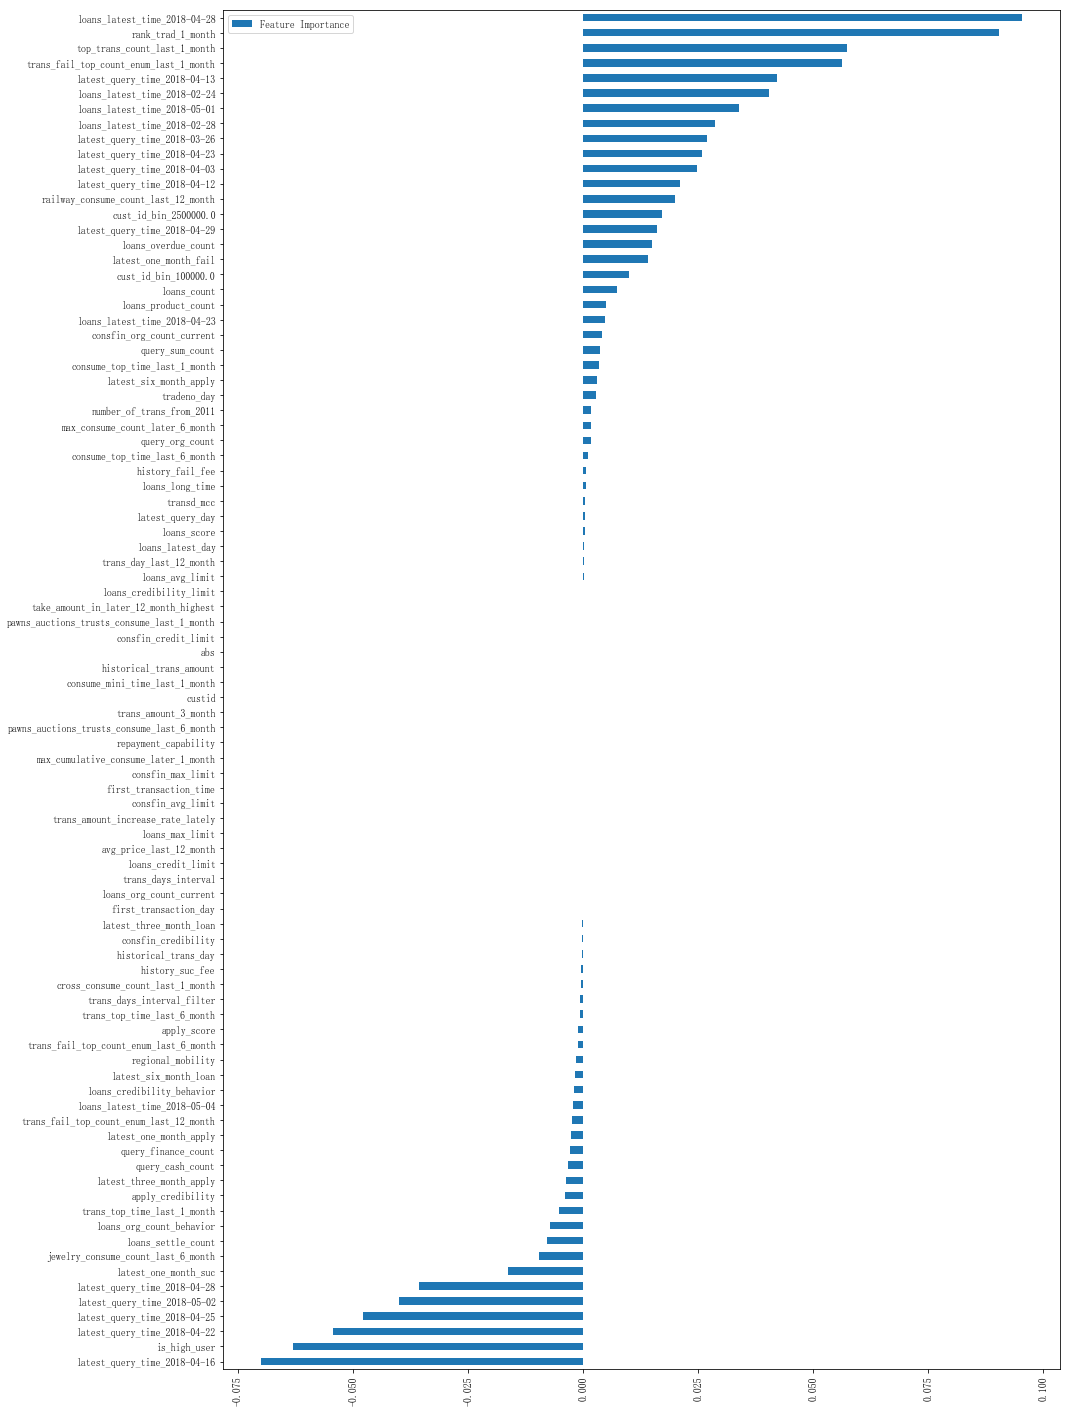

In [96]:
FI_lasso[FI_lasso['Feature Importance'] != 0].sort_values('Feature Importance').plot(kind = 'barh',figsize = (15,25))
plt.xticks(rotation = 90)

#### 相关性分析
- 暂时先放在这

In [103]:
xy = pd.concat([X_train,y_train],axis=1)

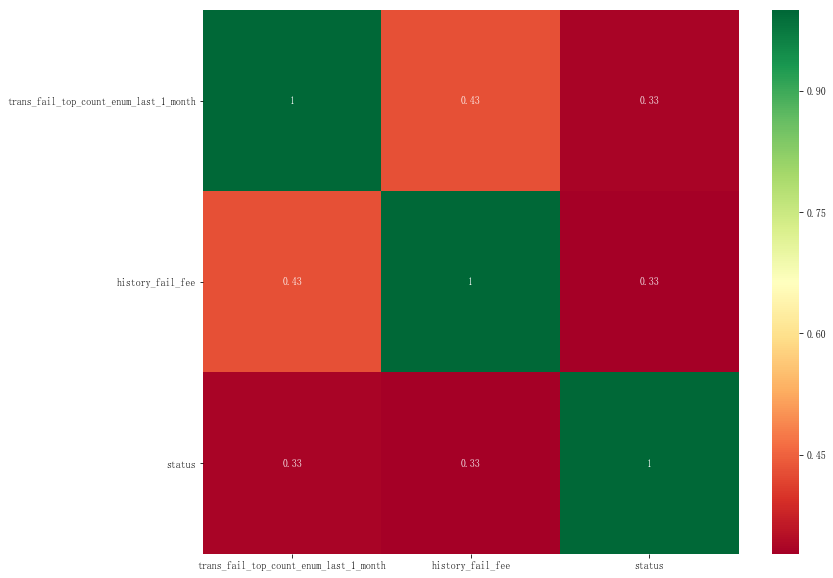

In [105]:
corrmat = xy.corr() #37*37
top_corr_features = corrmat.index[abs(corrmat['status'])>0.3]   #得到大于0.5的索引列 ['ID','AER','BsmtFinSF1']
#top_corr_features
plt.figure(figsize=(12,10))
g = sns.heatmap(xy[top_corr_features].corr(),annot=True, cmap='RdYlGn')

In [ ]:
--------------------到此为止 下面需要做一个特征筛选函数

In [ ]:
#可以考虑把无关的列删除、区分度不大的列
stats_df.sort_values('Unique_values', ascending=False)
#删除 source bank_card_no jewelry_consume_count_last_6_month  is_high_user、railway_consume_count_last_12_month 区分度不大 删除掉
# custid  trade_no  bank_card_no id_name
data = data.drop(['source','jewelry_consume_count_last_6_month','is_high_us  er','railway_consume_count_last_12_month','custid','trade_no','bank_card_no','id_name'],axis= 1)

In [ ]:
#处理缺失值  思路按照缺失比例进行填充删除
#  这里如果一个行的缺失值过多需要保留该样本吗
  
#将缺失值的列显示出来    
#stats_df.sort_values('Percentage of missing values', ascending=False).Feature.values
    
#Student feature中 NA代表不是学生用0代替
data.student_feature = data.student_feature.fillna(0)


#上个月交叉消费统计  用众数填充 众数为0
#data.cross_consume_count_last_1_month = data.cross_consume_count_last_1_month.fillna(data.cross_consume_count_last_1_month.mode()[0])



#latest_six_month_apply  最近6个月申请
# latest_three_month_apply最近3个月申请
#latest_query_day 最近查询天数
#apply_score 申请分数
#apply_credibility 申请可信度 
#query_org_count   查询org统计
missing = ['cross_consume_count_last_1_month',
       'apply_score', 'query_finance_count', 'query_cash_count',
       'query_sum_count', 'latest_one_month_apply',
       'latest_three_month_apply', 'latest_six_month_apply',
       'apply_credibility', 'query_org_count', 'latest_query_day',
       'loans_product_count', 'loans_org_count_current',
       'consfin_avg_limit', 'consfin_max_limit', 'consfin_product_count',
       'consfin_org_count_current', 'consfin_credibility',
       'consfin_credit_limit', 'loans_score',
       'loans_credibility_behavior', 'loans_count', 'loans_settle_count',
       'loans_avg_limit', 'loans_overdue_count',
       'loans_org_count_behavior', 'consfin_org_count_behavior',
       'loans_cash_count', 'latest_one_month_loan',
       'latest_three_month_loan', 'latest_six_month_loan',
       'loans_max_limit', 'history_fail_fee', 'latest_one_month_suc',
       'latest_one_month_fail', 'loans_long_time',
       'loans_credit_limit', 'loans_credibility_limit', 'history_suc_fee',
       'loans_latest_day', 'avg_price_top_last_12_valid_month',
       'consume_mini_time_last_1_month',
       'trans_fail_top_count_enum_last_1_month',
       'trans_fail_top_count_enum_last_12_month',
       'trans_fail_top_count_enum_last_6_month',
       'trans_days_interval_filter', 'max_consume_count_later_6_month',
       'consume_top_time_last_6_month', 'consume_top_time_last_1_month',
       'trans_top_time_last_6_month', 'trans_top_time_last_1_month',
       'trans_amount_increase_rate_lately',
       'number_of_trans_from_2011', 'regional_mobility',
       'trans_days_interval', 'low_volume_percent', 'rank_trad_1_month',
       'transd_mcc', 'trans_activity_day', 'trans_activity_month',
       'middle_volume_percent', 'historical_trans_day',
       'top_trans_count_last_1_month', 'avg_consume_less_12_valid_month',
       'trans_day_last_12_month', 'reg_preference_for_trad',
       'first_transaction_day']


time = ['loans_latest_time','latest_query_time','first_transaction_time']

for col in missing:
    data[col] = data[col].fillna(data[col].mode()[0])
    
#对于时间的填充，后期参考下大佬的操作吧
for col in time:
    data[col] = data[col].fillna(data[col].mode()[0])





In [ ]:
# 查看逾期与不逾期的比例
target_col = 'status'
labels = ['due','overdue']
due = data.loc[(data[target_col] == 0)].shape[0] #  (data[target_col] == 0).sum()
overdue = data.loc[(data[target_col] == 1)].shape[0]
x = [due,overdue] 

plt.figure(figsize=(8,6))
explode = [0, 0.1] # 0.1 凸出这部分，
plt.axes(aspect=1)  # set this , Figure is round, otherwise it is an ellipse
plt.pie(x,labels =labels,autopct='%1.2f%%',explode=explode,shadow=True)

In [ ]:
x = data.drop('status',axis=1)
y = data.status
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state =2018,shuffle = True,stratify = y) 
#shuffle 跟random_state是什么关系？ 只有shuffle为真时，random_state才会起作用,而且此时，无法进行分层stratified。
# shuffle为True,即按照random_state状态进行shuffle.分层是严格按照30%比例进行，不分层的话因为是随机数进行shuffle，所以是在30%上下浮动

In [ ]:
#y_train[y_train == 1].size,y_test[y_test == 1].size ,y_train[y_train == 0].size,y_test[y_test == 0].size
X_train.shape[0], X_test.shape[0], y_train.size, y_test.size